In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


[]

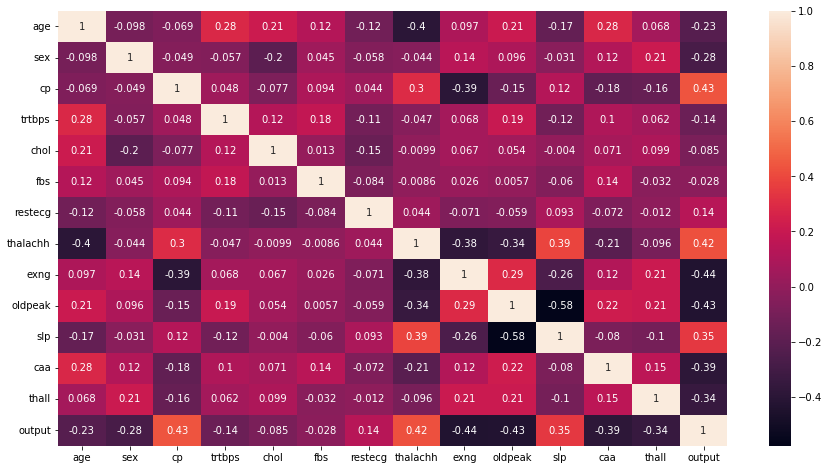

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.plot()

In [9]:
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous = ["age","trtbps","chol","thalachh","oldpeak"]
target = ["output"]
print("The categorial variables are : ", categorical)
print("The continuous variables are : ", continuous)
print("The target variable is : ", target)

The categorial variables are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous variables are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :  ['output']


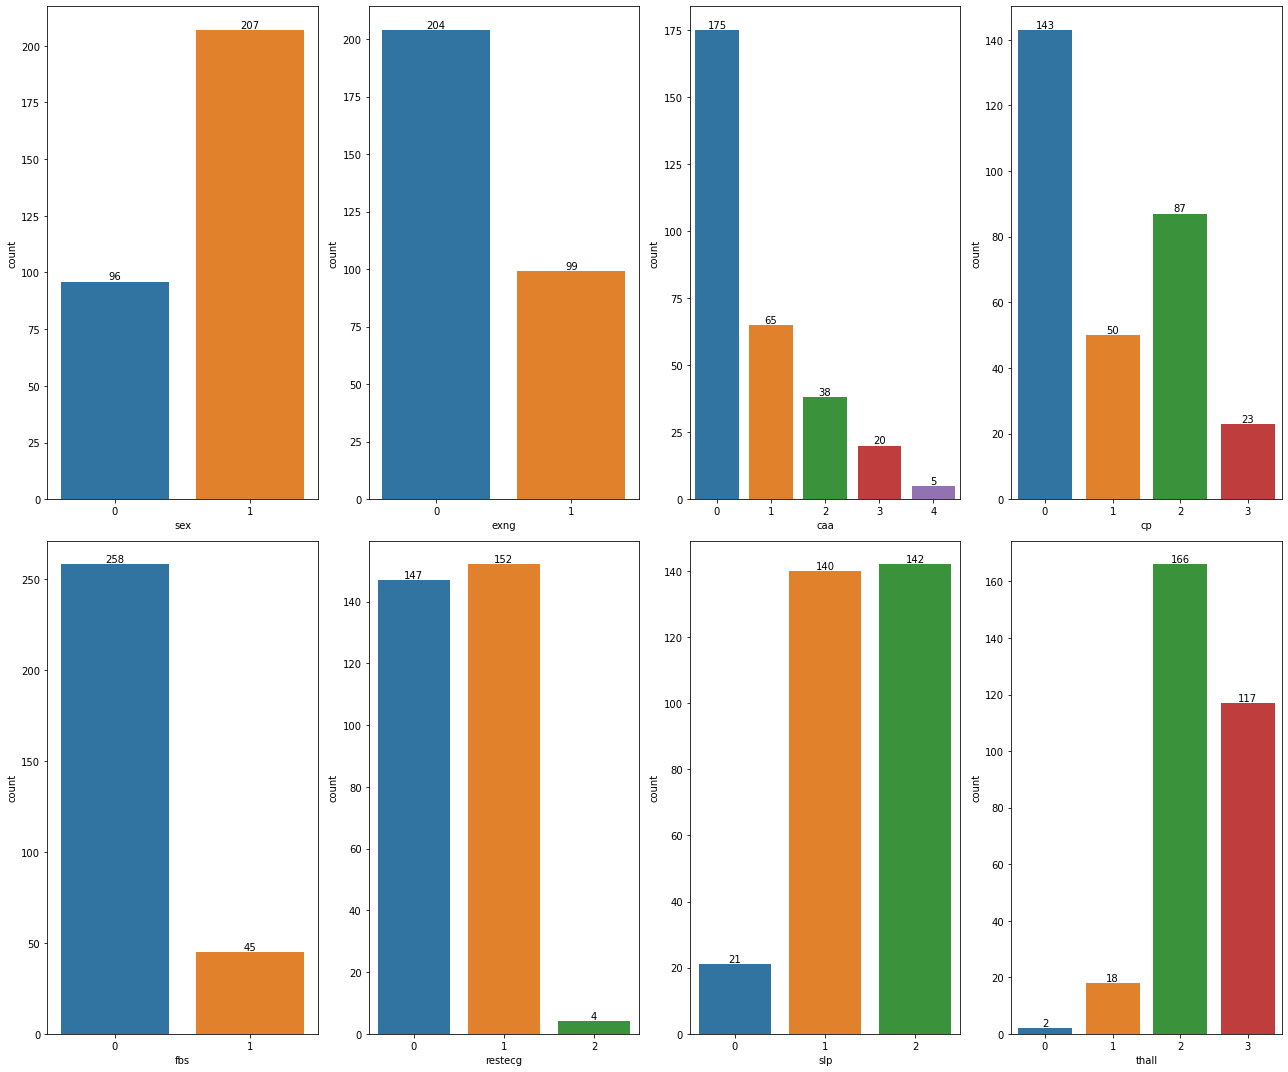

In [10]:
fig = plt.figure(figsize=(18,15))
grid = fig.add_gridspec(2,4)
ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x=categorical[0], ax=ax0)
ax0.bar_label(ax0.containers[0])
ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x=categorical[1], ax=ax1)
ax1.bar_label(ax1.containers[0])
ax2 = fig.add_subplot(grid[0,2])
sns.countplot(data=df, x=categorical[2], ax=ax2)
ax2.bar_label(ax2.containers[0])
ax3 = fig.add_subplot(grid[0,3])
sns.countplot(data=df, x=categorical[3], ax=ax3)
ax3.bar_label(ax3.containers[0])
ax4 = fig.add_subplot(grid[1,0])
sns.countplot(data=df, x=categorical[4], ax=ax4)
ax4.bar_label(ax4.containers[0])
ax5 = fig.add_subplot(grid[1,1])
sns.countplot(data=df, x=categorical[5], ax=ax5)
ax5.bar_label(ax5.containers[0])
ax6 = fig.add_subplot(grid[1,2])
sns.countplot(data=df, x=categorical[6], ax=ax6)
ax6.bar_label(ax6.containers[0])
ax7 = fig.add_subplot(grid[1,3])
sns.countplot(data=df, x=categorical[7], ax=ax7)
ax7.bar_label(ax7.containers[0])
plt.tight_layout()

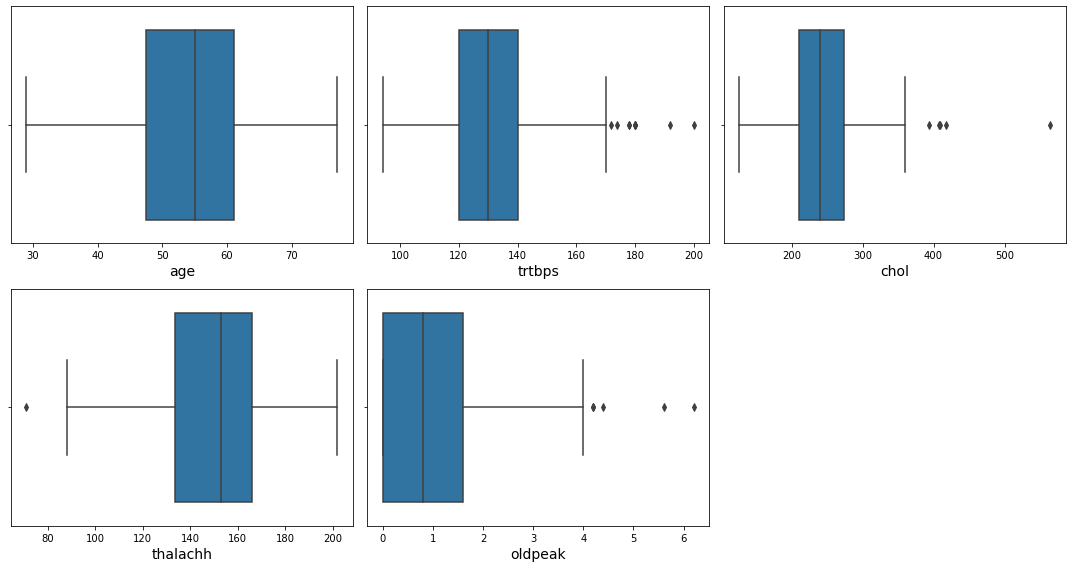

In [11]:
fig = plt.figure(figsize=(15,8))
grid = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(grid[0,0])
sns.boxplot(data=df, x=continuous[0], ax=ax0)
ax0.set_xlabel('age', fontsize=14)
ax1 = fig.add_subplot(grid[0,1])
sns.boxplot(data=df, x=continuous[1], ax=ax1)
ax1.set_xlabel('trtbps', fontsize=14)
ax2 = fig.add_subplot(grid[0,2])
sns.boxplot(data=df, x=continuous[2], ax=ax2)
ax2.set_xlabel('chol', fontsize=14)
ax3 = fig.add_subplot(grid[1,0])
sns.boxplot(data=df, x=continuous[3], ax=ax3)
ax3.set_xlabel('thalachh', fontsize=14)
ax4 = fig.add_subplot(grid[1,1])
sns.boxplot(data=df, x=continuous[4], ax=ax4)
ax4.set_xlabel('oldpeak', fontsize=14)
plt.tight_layout()

[Text(0, 0, '138'), Text(0, 0, '165')]

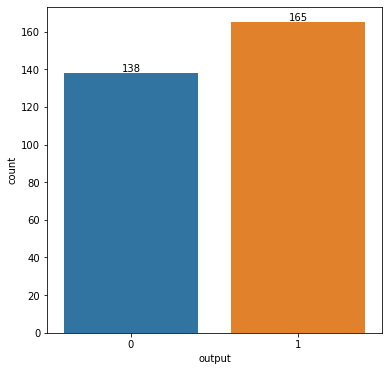

In [12]:
fig = plt.figure(figsize=(6,6))
out = sns.countplot(x='output', data=df)
out.bar_label(out.containers[0])


In [13]:
X = df.drop(['output'],axis = 1)
Y= df['output']


In [14]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [15]:
lr = LogisticRegression()
lr_params = {'C':[0.01,0.1,1],
 'penalty':['l1','l2','elasticnet'],
 'solver':['liblinear','lbfgs']}


In [16]:
logreg_cv = GridSearchCV(lr,lr_params,cv=5)
logreg_cv.fit(X_train, Y_train)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs']})

In [17]:

print("Best Parameters :",logreg_cv.best_params_)
print("GridSearch Accuracy :",(logreg_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearch Accuracy : 82.64 %


In [18]:

y_predict=logreg_cv.predict(X_test)
print("Logistic Regression model accuracy:",
 ( accuracy_score(Y_test, y_predict)*100).round(2),'%')


Logistic Regression model accuracy: 86.89 %


In [19]:
svm = SVC()
svm_params = {'C':[0.01,0.1,1],
 'kernel':['linear', 'rbf','poly','sigmoid'],
 'degree':[2,3,4,5],
 'gamma':[0.01,0.1,1.0]}

In [ ]:
svm_cv = GridSearchCV(svm,svm_params,cv=5)
svm_cv.fit(X_train, Y_train)


In [ ]:
print('Best Parameters :',svm_cv.best_params_)
print("GridSearch Accuracy :",(svm_cv.best_score_*100).round(2),'%')


In [ ]:
y_predict=svm_cv.predict(X_test)


In [ ]:
plot_confusion_matrix(Y_test,y_predict)

In [ ]:
tree = DecisionTreeClassifier()
tree_params = {'criterion':['gini','entropy','log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': ['None',2, 4, 6, 8],
 'min_samples_split': [2, 4, 6, 8, 10],
               'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
 'max_features': ['auto', 'sqrt','log2']}

In [ ]:
tree_cv = GridSearchCV(tree,tree_params,cv=5)
tree_cv.fit(X_train, Y_train)


In [ ]:
print('Best Parameters :',tree_cv.best_params_)
print("GridSearch Accuracy :",(tree_cv.best_score_*100).round(2),'%')

In [ ]:
y_predict=tree_cv.predict(X_test)
print("Decision Tree model accuracy:",
 ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

In [ ]:
KNN = KNeighborsClassifier()
knn_params = {'n_neighbors': list(range(1,30)),
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': [1,2]}


In [ ]:

knn_cv = GridSearchCV(KNN,knn_params,cv=10)
knn_cv.fit(X_train, Y_train)

In [ ]:
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Accuracy :",knn_cv.best_score_)

In [ ]:
y_predict=knn_cv.predict(X_test)
print("K-Neighbors model accuracy:",
 ( accuracy_score(Y_test, y_predict)*100).round(2),'%

In [ ]:
mods = {'LogReg':[logreg_cv.best_score_,logreg_cv.score(X_test, Y_test)],'SVM':[svm_cv.best_score_,svm_cv.score(X_test,
scores = pd.DataFrame.from_dict(mods, orient='index',columns=['Best CV Score','Test Score'])
scores
